## Zadanie 1

Plik ``excercise`` zawiera wynik y i dane wejściowe x1, x2 dla 40 punktów danych, z dalszymi 20 punktami z danymi wejściowymi, ale bez wyniku.

- Wczytać plik do dataframe'a.

In [17]:
import pandas as pd
exercise=pd.read_csv("exercise.csv")
exercise

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


- Dopasować model regresji liniowej przewidujący y z x1, x2, używając pierwszych 40 punktów danych w pliku. 

In [18]:
from statsmodels.formula.api import ols

trainData = exercise[['x1','x2','y']][:40]

#fit simple linear regression model
model = ols('y ~ x1+x2', data=trainData).fit()

- Podsumować wnioski i sprawdzić dopasowanie modelu.

In [19]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.41e-29
Time:                        12:04:33   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.0

- Wykonaj wykres residuów dla tego modelu. Czy wydaje się, że założenia zostały spełnione?

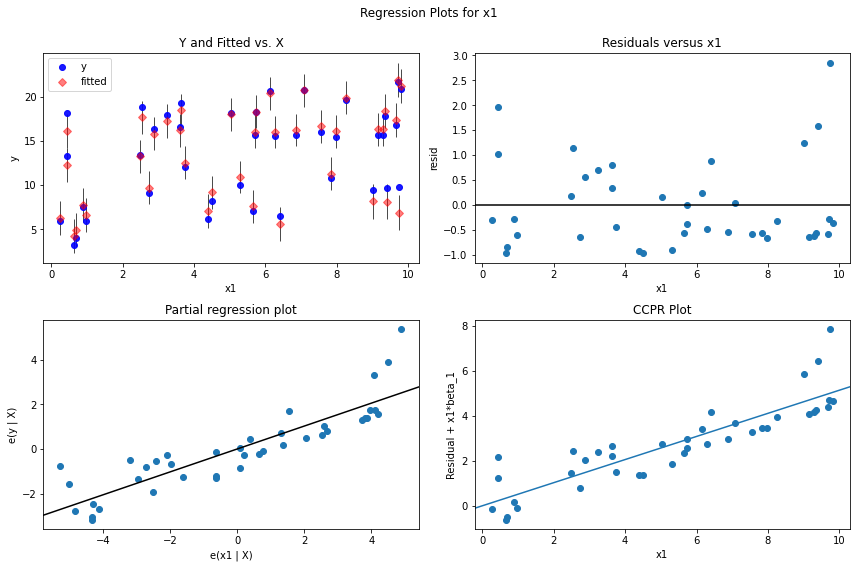

In [26]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Z wykresów wynika, że spełniono założenia
#create residual vs. predictor plot for 'x1'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x1', fig=fig)

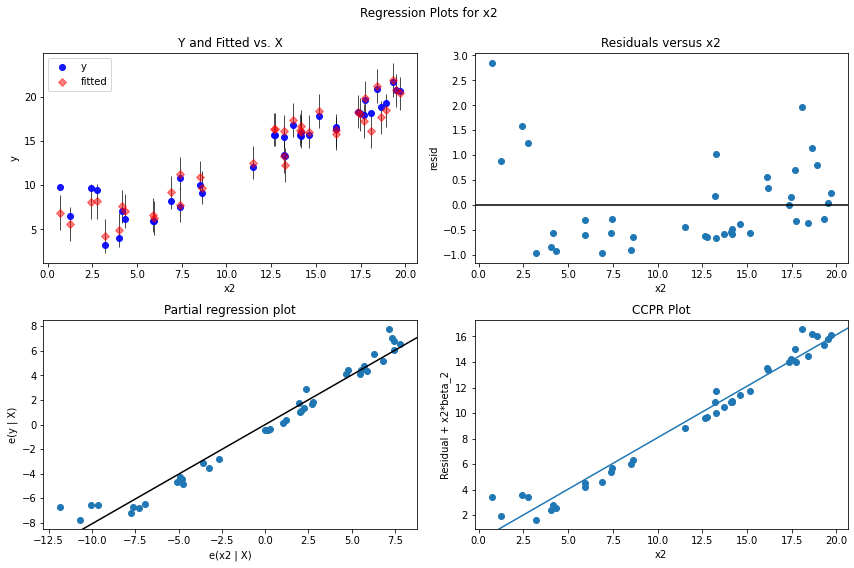

In [28]:
#create residual vs. predictor plot for 'x2'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x2', fig=fig)

- Wyświetl oszacowany model graficznie.
- Wykonaj prognozy dla pozostałych 20 punktów danych w pliku. Oceń pewność co do prognozach?

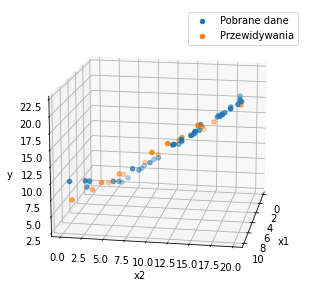

In [36]:
# Prognozy na danych testowych wydają się być adekwatne biorąc pod uwagę zachowanie funkcji na danych treningowych

from mpl_toolkits.mplot3d import Axes3D

Xtest = exercise[['x1','x2']][40:]
Ytest = model.predict(Xtest)

ax = Axes3D(plt.figure())

ax.scatter(trainData['x1'], trainData['x2'], trainData['y'])
ax.scatter(Xtest['x1'], Xtest['x2'], Ytest)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend(['Pobrane dane', 'Przewidywania'])
ax.view_init(15, 10)
plt.show()


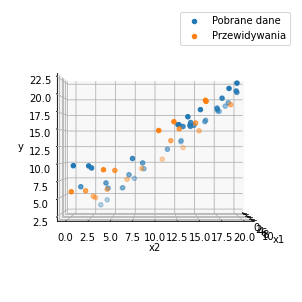

In [38]:
ax = Axes3D(plt.figure())

ax.scatter(trainData['x1'], trainData['x2'], trainData['y'])
ax.scatter(Xtest['x1'], Xtest['x2'], Ytest)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend(['Pobrane dane', 'Przewidywania'])
ax.view_init(0, 0)
plt.show()


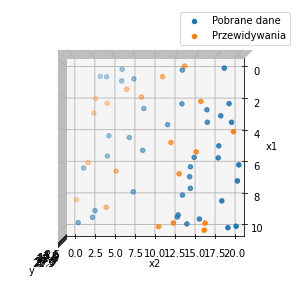

In [39]:
ax = Axes3D(plt.figure())

ax.scatter(trainData['x1'], trainData['x2'], trainData['y'])
ax.scatter(Xtest['x1'], Xtest['x2'], Ytest)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend(['Pobrane dane', 'Przewidywania'])
ax.view_init(90, 0)
plt.show()

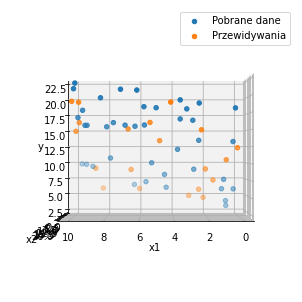

In [40]:
ax = Axes3D(plt.figure())

ax.scatter(trainData['x1'], trainData['x2'], trainData['y'])
ax.scatter(Xtest['x1'], Xtest['x2'], Ytest)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend(['Pobrane dane', 'Przewidywania'])
ax.view_init(0, 90)
plt.show()